# **📊 Building a Bookstore DB**

- **Author:** Basel Amr Barakat  
- **Email:** baselamr52@gmail.com  
- **Date:** 2024-1-2  
- **Task Name:** Building a Bookstore DB
- **Task Number:** 25  
- **Part:**  Introduciton to Data Base Managnment
- **Module:** From Data to AI
- **Submit Number:** 1

### **Description:**
This task helps you understand database concepts and practice SQL by creating a simple bookstore database schema, inserting data, and performing various queries.



### **Requirements:**

1. **Requirement 1: Create Database and Tables.**  
   - **Description:**  
     1. Create a database named Bookstore.
     2. Create tables for Authors, Books, and Sales with appropriate data types and relationships.

2. **Requirement 2: Insert Sample Data**  
   - **Description:**  
     1. Insert at least 5 authors into the Authors table.
     2. Insert at least 10 books, ensuring to link them to authors.
     3. Insert sample sales data.

3. **Requirement 3: Query and Use SQL Joins**  
   - **Description:**  
    1. Write queries to retrieve all books and their authors.
    2. Write a query to find total sales per book.
    3. Write a query using JOIN to combine data from Books and Sales.


**DataBase Schema: 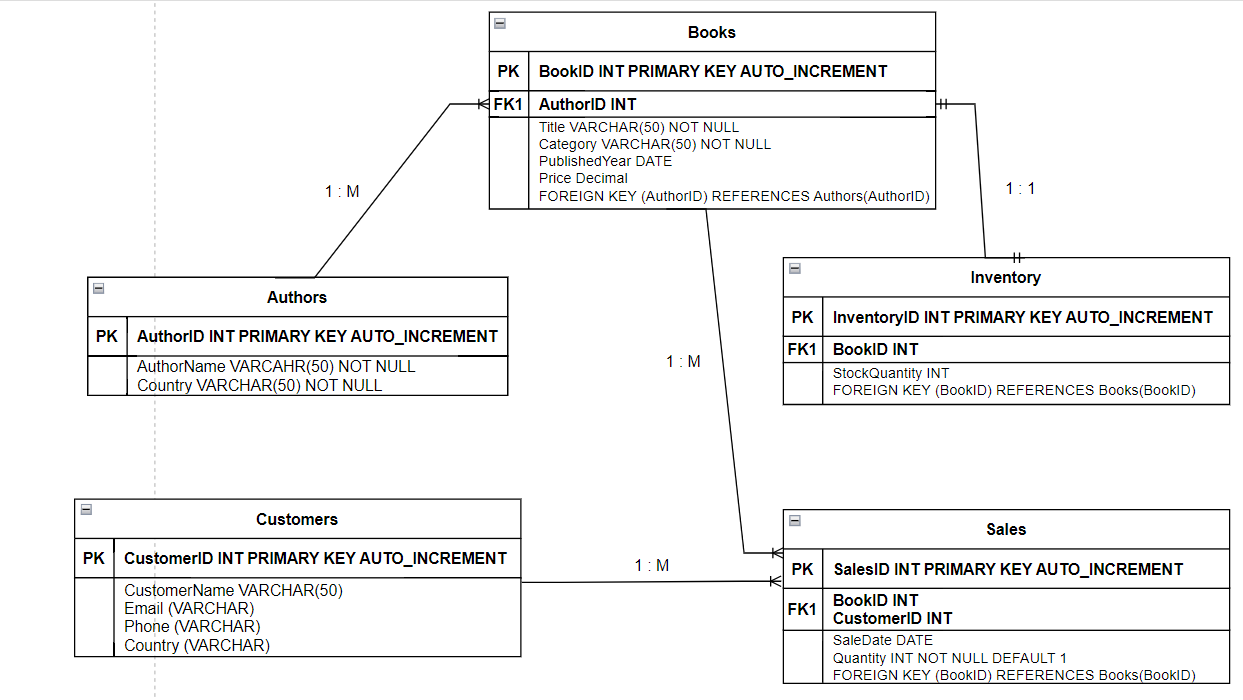**

# 📌 **1. Requirement 1**
***Task Name :*** Create Database and Tables

***Description :***
1. Create a database named Bookstore.
2. Create tables for Authors, Books, and Sales with appropriate data types and relationships.

## 1.1 Create a database named Bookstore.
Create a BookStore DataBase using the following command
```
# CREATE DATABASE IF NOT EXISTS BookStore
```



In [2]:
import sqlite3
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio

In [3]:
# Create the DataBase I
# Creating a database file
DB_NAME = 'BookStore.db'
if os.path.exists(DB_NAME):
    os.remove(DB_NAME)
# Connect to SQLite database
conn = sqlite3.connect(DB_NAME)
cursor = conn.cursor()
print("✅ Database connection established.")

✅ Database connection established.


## 1.2 Create tables for Authors, Books, and Sales with appropriate data types and relationships.

### 1.2.1 Create Authors Table: Stores information about book authors.

**Table 1 : Authors**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `AuthorID`      | INT | to store the name of the author `PRIMARY KEY` |
| `AuthorName` | VARCHAR | to store the name of the author |
| `Country`| VARCHAR | to store the country of the author |

We will Create the Table using the following command


```
CREATE TABLE IF NOT EXIST Authors(
        AuthorID INT PRIMARY KEY AUTOINCREMENT,
        AuthorName VARCHAR(50) NOT NULL,
        Country    VARCHAR(50) NOT NULL
)
```
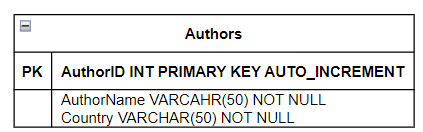



In [4]:
# Create Authors Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Authors(
    AuthorID INTEGER PRIMARY KEY AUTOINCREMENT,
    AuthorName VARCHAR(50) NOT NULL,
    Country VARCHAR(50) NOT NULL
);
''')
conn.commit()

print("Authors table created successfully!")
# Display Books table structure
books_df = pd.read_sql_query("PRAGMA table_info(Authors);", conn)
books_df

Authors table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,AuthorID,INTEGER,0,None,1
1,1,AuthorName,VARCHAR(50),1,None,0
2,2,Country,VARCHAR(50),1,None,0


### 1.2.2 Create Books Table: Stores information about books and links to authors.

**Table 2 : Books**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `BookID`      | INT | to store the id of the book `PRIMARY KEY` |
| `AuthorID` | INT | to link between the book and it's author `FOREIGN KEY` |
| `Title`| VARCHAR | to store the name of the book |
| `Category`| VARCHAR | to store the category of the book |
| `PublishedYear`| DATE | to store the date of publication of the book |
| `Price`| DECIMAL(10,2) | to store the price of the book |

We will Create the Table using the following command

```
CREATE TABLE Books (
    BookID INT PRIMARY KEY AUTO_INCREMENT,
    Title VARCHAR(50) NOT NULL,
    AuthorID INT,
    Category VARCHAR(50) NOT NULL,
    PublishedYear DATE,
    Price DECIMAL(10,2),
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);
```

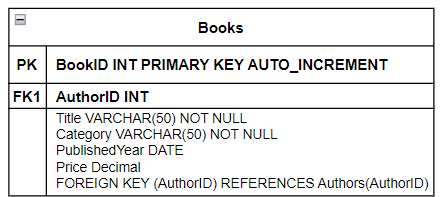



In [5]:
# Create Books Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Books(
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title VARCHAR NOT NULL,
    AuthorID INTEGER,
    Category VARCHAR NOT NULL,
    PublishedYear DATE,
    Price DECIMAL,
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);
''')
conn.commit()

print("Books table created successfully!")

# Display Books table structure
books_df = pd.read_sql_query("PRAGMA table_info(Books);", conn)
books_df


Books table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,BookID,INTEGER,0,None,1
1,1,Title,VARCHAR,1,None,0
2,2,AuthorID,INTEGER,0,None,0
3,3,Category,VARCHAR,1,None,0
4,4,PublishedYear,DATE,0,None,0
5,5,Price,DECIMAL,0,None,0


### 1.2.3 Customers Table: Tracks customer details.

**Table 3 : Customers**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `CustomerID`      | INT | to store the id of the customer `PRIMARY KEY` |
| `CustomerName` | VARCHAR | to store the name of the customer |
| `Email`| VARCHAR | to store the mail of the customer |
| `Phone`| VARCHAR | to store the phone number of the customer |


We will Create the Table using the following command

```
CREATE TABLE IF NOT EXISTS Customers(
    CustomerID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerName VARCHAR NOT NULL,
    Email VARCHAR UNIQUE NOT NULL,
    Phone VARCHAR,
);
```
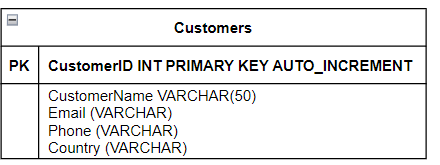


In [6]:
# Create Customers Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers(
    CustomerID INTEGER PRIMARY KEY AUTOINCREMENT,
    CustomerName TEXT NOT NULL,
    Email TEXT UNIQUE NOT NULL,
    Phone TEXT
);
''')
conn.commit()

print("Customers table created successfully!")

# Display Customers table structure
customers_df = pd.read_sql_query("PRAGMA table_info(Customers);", conn)
customers_df


Customers table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,CustomerID,INTEGER,0,None,1
1,1,CustomerName,TEXT,1,None,0
2,2,Email,TEXT,1,None,0
3,3,Phone,TEXT,0,None,0


### 1.2.4 Create Sales Table: Tracks sales transactions for books.

**Table 4 : Sales**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `SaleID`      | INT | to store the id of the sales `PRIMARY KEY` |
| `BookID` | INT | to link between it and the book that has been sold `FOREIGN KEY` |
| `CustomerID `| INT | to link between it and the customer who bought  this book ` FOREIGN KEY` |
| `SaleDate`| DATE | to store the date of the book when it was sold |
| `Quantity`| INT | to store the number of books have been sold |


We will Create the Table using the following command

```
CREATE TABLE IF NOT EXISTS Sales(
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    CustomerID INTEGER,
    SaleDate DATE,
    Quantity INTEGER NOT NULL DEFAULT 1,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
);
```

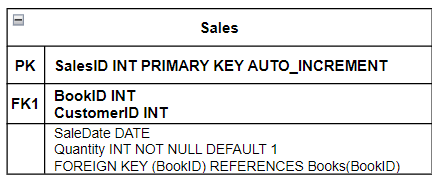

In [7]:
# Create Sales Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Sales(
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    CustomerID INTEGER,
    SaleDate DATE,
    Quantity INTEGER NOT NULL DEFAULT 1,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
);
''')
conn.commit()

print("Sales table created successfully!")

# Display Sales table structure
sales_df = pd.read_sql_query("PRAGMA table_info(Sales);", conn)
sales_df

Sales table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,SaleID,INTEGER,0,None,1
1,1,BookID,INTEGER,0,None,0
2,2,CustomerID,INTEGER,0,None,0
3,3,SaleDate,DATE,0,None,0
4,4,Quantity,INTEGER,1,1,0


### 1.2.5 Create Inventory Table: Tracks stock levels for books.

**Table 5 : Inventory**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `InventoryID`      | INT | to store the id of the inventory `PRIMARY KEY` |
| `BookID` | INT | to link between the inventory and the book `FOREIGN KEY` |
| `StockQuantity`| INT | to store quantity in the stock|


We will Create the Table using the following command

```
CREATE TABLE IF NOT EXISTS Inventory(
    InventoryID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    StockQuantity INTEGER NOT NULL DEFAULT 0,
    FOREIGN KEY (BookID) REFERENCES Books(BookID)
);
```
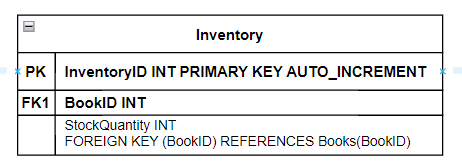


In [8]:
# Create Inventory Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Inventory(
    InventoryID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    StockQuantity INTEGER NOT NULL DEFAULT 0,
    FOREIGN KEY (BookID) REFERENCES Books(BookID)
);
''')
conn.commit()

print("Inventory table created successfully!")

# Display Inventory table structure
inventory_df = pd.read_sql_query("PRAGMA table_info(Inventory);", conn)
inventory_df


Inventory table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,InventoryID,INTEGER,0,None,1
1,1,BookID,INTEGER,0,None,0
2,2,StockQuantity,INTEGER,1,0,0


# 📌 **2. Requirement 2**
***Task Name :*** Insert Sample Data

***Description :***  
1. Insert at least 5 authors into the Authors table.
2. Insert at least 10 books, ensuring to link them to authors.
3. Insert sample sales data.

## **2.1  Insert at least 5 authors into the Authors table.**

We will Insert data in Authors Table using the following command



```
INSERT INTO Authors (AuthorName, Country) VALUES
('Stephen King','USA'),
('John Ronald Reuel Tolkien','England'),
('William Shakespeare','England'),
('Lewis Carroll', 'England'),
('Agatha Christie','England'),
('Arthur Conan Doyle','Scotland'),
('George Orwell', 'UK'),
('J.K. Rowling', 'UK'),
('Ernest Hemingway', 'USA'),
('Jane Austen', 'UK'),
('Mark Twain', 'USA');
```




In [9]:
# Insert sample data into Authos
authors_data = [
    ('Stephen King','USA'),
    ('John Ronald Reuel Tolkien','England'),
    ('William Shakespeare','England'),
    ('Lewis Carroll', 'England'),
    ('Agatha Christie','England'),
    ('Arthur Conan Doyle','Scotland'),
    ('George Orwell', 'UK'),
    ('J.K. Rowling', 'UK'),
    ('Ernest Hemingway', 'USA'),
    ('Jane Austen', 'UK'),
    ('Mark Twain', 'USA')
]

# Insert the data from authors_data into the table Authors
cursor.executemany('''
INSERT INTO Authors (AuthorName, Country)
VALUES (?, ?);
''', authors_data)
conn.commit()

print("Sample data inserted into Authors table successfully!")

# Display Authors table
authors_df = pd.read_sql_query("SELECT * FROM Authors;", conn)
authors_df.to_excel("authors.xlsx", index=False)
authors_df

Sample data inserted into Authors table successfully!


,AuthorID,AuthorName,Country
0,1,Stephen King,USA
1,2,John Ronald Reuel Tolkien,England
2,3,William Shakespeare,England
3,4,Lewis Carroll,England
4,5,Agatha Christie,England
5,6,Arthur Conan Doyle,Scotland
6,7,George Orwell,UK
7,8,J.K. Rowling,UK
8,9,Ernest Hemingway,USA
9,10,Jane Austen,UK


## **2.2  Insert at least 10 books, ensuring to link them to authors.**

We will Insert data in Books Table using the following command



```
INSERT INTO Books (Title, AuthorID, Category, PublishedYear, Price) VALUES
('Doctor Sleep', 1, 'Horror', '2013-12-1' , 12.5),
('Thinner ', 1, 'Drama', '1984-12-3' , 13.5),
('The Gunslinger', 1, 'Comedy', '1970-1-1' ,11.5),
('The Lord of the Rings', 2, 'Fantasy', '1954-2-2' , 10.5),
('The Hobbit', 2, 'Fantasy', '1937-1-2', 14.5),
('The Fall of Númenor', 2, 'Fantasy','2022-1-1', 12.5),
('Hamlet', 3, 'Tragedy','1599-1-1', 10.5),
('The Tempest', 3, 'Drama', '1610-3-3', 14.5),
('The Tragedie of Macbeth', 3, 'Tragedy', '1606-12-12', 11.5),
('Alices Adventures in Wonderland', 4, 'Fantasy', '1903-12-1', 10.5),
('Murder on the Orient Express', 5, 'Crime','2008-1-1', 2.5),
('The Adventures of Sherlock Holmes', 6, 'Detective','1892-2-2', 11.5),
('Animal Farm', 7, 'Novella','1945-2-2', 10.5),
('Harry Potter and the Deathly Hallows', 8, 'Fantnasy','2007-12-12', 9.5),
('The Old Man and the Sea', 9, 'Novella','1950-1-1', 12.5),
('A Farewell to Arms', 9, 'War story','1929-2-2', 11.5),
('Pride and Prejudice', 10, 'Romance','1813-1-1', 8.5),
('Emma', 4, 'Romance', '1815-2-2', 7.99),
('Life on the Mississippi', 5, 'Non-fiction', '1883-12-12', 11.99);
```




In [10]:
# Insert sample data into Books
books_data = [
    ('Doctor Sleep', 1, 'Horror', '2013-12-1' , 12.5),
    ('Thinner ', 1, 'Drama', '1984-12-3' , 13.5),
    ('The Gunslinger', 1, 'Comedy', '1970-1-1' ,11.5),
    ('The Lord of the Rings', 2, 'Fantasy', '1954-2-2' , 10.5),
    ('The Hobbit', 2, 'Fantasy', '1937-1-2', 14.5),
    ('The Fall of Númenor', 2, 'Fantasy','2022-1-1', 12.5),
    ('Hamlet', 3, 'Tragedy','1599-1-1', 10.5),
    ('The Tempest', 3, 'Drama', '1610-3-3', 14.5),
    ('The Tragedie of Macbeth', 3, 'Tragedy', '1606-12-12', 11.5),
    ('Alices Adventures in Wonderland', 4, 'Fantasy', '1903-12-1', 10.5),
    ('Murder on the Orient Express', 5, 'Crime','2008-1-1', 2.5),
    ('The Adventures of Sherlock Holmes', 6, 'Detective','1892-2-2', 11.5),
    ('Animal Farm', 7, 'Novella','1945-2-2', 10.5),
    ('Harry Potter and the Deathly Hallows', 8, 'Fantnasy','2007-12-12', 9.5),
    ('The Old Man and the Sea', 9, 'Novella','1950-1-1', 12.5),
    ('A Farewell to Arms', 9, 'War story','1929-2-2', 11.5),
    ('Pride and Prejudice', 10, 'Romance','1813-1-1', 8.5),
    ('Emma', 4, 'Romance', '1815-2-2', 7.99),
    ('Life on the Mississippi', 5, 'Non-fiction', '1883-12-12', 11.99)
]

cursor.executemany('''
INSERT INTO Books (Title, AuthorID, Category, PublishedYear, Price)
VALUES (?, ?, ?, ?, ?);
''', books_data)
conn.commit()

print("Sample data inserted into Books table successfully!")

# Display Books table
books_df = pd.read_sql_query("SELECT * FROM Books;", conn)
books_df.to_excel("books.xlsx", index=False)
books_df


Sample data inserted into Books table successfully!


,BookID,Title,AuthorID,Category,PublishedYear,Price
0,1,Doctor Sleep,1,Horror,2013-12-1,12.50
1,2,Thinner,1,Drama,1984-12-3,13.50
2,3,The Gunslinger,1,Comedy,1970-1-1,11.50
3,4,The Lord of the Rings,2,Fantasy,1954-2-2,10.50
4,5,The Hobbit,2,Fantasy,1937-1-2,14.50
5,6,The Fall of Númenor,2,Fantasy,2022-1-1,12.50
6,7,Hamlet,3,Tragedy,1599-1-1,10.50
7,8,The Tempest,3,Drama,1610-3-3,14.50
8,9,The Tragedie of Macbeth,3,Tragedy,1606-12-12,11.50
9,10,Alices Adventures in Wonderland,4,Fantasy,1903-12-1,10.50


## **2.3 Insert sample Inventory data.**

We will Insert data in Inventory Table using the following command



```
INSERT INTO Inventory (BookID, StockQuantity) VALUES
(1, 50),
(2, 30),
(3, 20),
(4, 15),
(5, 1),
(6, 3),
(7, 4),
(8, 5),
(9, 15),
(10, 10),
(11, 50),
(12, 30),
(13, 20),
(14, 15),
(15, 1),
(16, 3),
(17, 4),
(18, 5),
(19, 15);
```




In [11]:
# Insert sample data into Inventory
inventory_data = [
    (1, 50),
    (2, 30),
    (3, 20),
    (4, 15),
    (5, 11),
    (6, 13),
    (7, 14),
    (8, 15),
    (9, 15),
    (10, 10),
    (11, 50),
    (12, 30),
    (13, 20),
    (14, 15),
    (15, 11),
    (16, 13),
    (17, 14),
    (18, 15),
    (19, 15)
]

cursor.executemany('''
INSERT INTO Inventory (BookID, StockQuantity)
VALUES (?, ?);
''', inventory_data)
conn.commit()

print("Sample data inserted into Inventory table successfully!")

# Display Inventory table
inventory_df = pd.read_sql_query("SELECT * FROM Inventory;", conn)
inventory_df.to_excel("inventory.xlsx", index=False)
inventory_df


Sample data inserted into Inventory table successfully!


,InventoryID,BookID,StockQuantity
0,1,1,50
1,2,2,30
2,3,3,20
3,4,4,15
4,5,5,11
5,6,6,13
6,7,7,14
7,8,8,15
8,9,9,15
9,10,10,10


## **2.4 Insert sample Customers data.**

We will Insert data in Customers Table using the following command



```
INSERT INTO Customers (CustomerName, Email, Phone) VALUES
('Basel Amr', 'baselamr52@gmail.com', '01000907482'),
('Omar Mohamed', 'Omar@gmail.com', '0987654321'),
('Abanoub', 'abanoub@gmail.com', '5678901234');
```




In [12]:
# Insert sample data into Customers
customers_data = [
    ('Basel Amr', 'baselamr52@gmail.com', '01000907482'),
    ('Omar Mohamed', 'Omar@gmail.com', '0987654321'),
    ('Abanoub', 'abanoub@gmail.com', '5678901234')
]

cursor.executemany('''
INSERT INTO Customers (CustomerName, Email, Phone)
VALUES (?, ?, ?);
''', customers_data)
conn.commit()

print("Sample data inserted into Customers table successfully!")

# Display Customers table
customers_df = pd.read_sql_query("SELECT * FROM Customers;", conn)
customers_df.to_excel("customers.xlsx", index=False)
customers_df


Sample data inserted into Customers table successfully!


,CustomerID,CustomerName,Email,Phone
0,1,Basel Amr,baselamr52@gmail.com,01000907482
1,2,Omar Mohamed,Omar@gmail.com,0987654321
2,3,Abanoub,abanoub@gmail.com,5678901234


## **2.5 Insert sample Sales data.**

We will Insert data in Sales Table using the following command



```
INSERT INTO Sales (BookID, SaleDate, Quantity) VALUES
(1, '2024-12-01', 5),
(2, '2024-12-02', 3),
(3, '2024-12-03', 7),
(4, '2024-12-04', 4),
(5, '2024-12-05', 6),
(6, '2024-12-06', 2),
(7, '2024-12-07', 5),
(8, '2024-12-08', 3),
(9, '2024-12-09', 4),
(10, '2024-12-10', 1),
(11, '2024-12-11', 2),
(12, '2024-12-12', 3),
(13, '2024-12-13', 4),
(14, '2024-12-14', 5),
(15, '2024-12-15', 6),
(16, '2024-12-16', 1),
(17, '2024-12-17', 1),
(18, '2024-12-18', 3),
(19, '2024-12-19', 4),
(3, '2024-12-13', 7);
```




In [13]:
# Insert sample data into Sales
sales_data = [
    (1, 2, '2024-12-01', 5),
    (2, 1, '2024-12-02', 3),
    (3, 3, '2024-12-03', 7),
    (4, 1, '2024-12-04', 4),
    (5, 1, '2024-12-05', 6),
    (6, 1, '2024-12-06', 2),
    (7, 1, '2024-12-07', 5),
    (8, 2, '2024-12-08', 3),
    (9, 3, '2024-12-09', 4),
    (10, 3, '2024-12-10', 1),
    (11, 2, '2024-12-11', 2),
    (12, 1, '2024-12-12', 3),
    (13, 2, '2024-12-13', 4),
    (14, 2, '2024-12-14', 5),
    (15, 1, '2024-12-15', 6),
    (16, 1, '2024-12-16', 1),
    (17, 1, '2024-12-17', 1),
    (18, 1, '2024-12-18', 3),
    (19, 3, '2024-12-19', 4),
    (3, 2, '2024-12-13', 7)
]

cursor.executemany('''
INSERT INTO Sales (BookID, CustomerID, SaleDate, Quantity)
VALUES (?, ?, ?, ?);
''', sales_data)
conn.commit()

print("Sample data inserted into Sales table successfully!")

# Display Sales table
sales_df = pd.read_sql_query("SELECT * FROM Sales;", conn)
sales_df.to_excel("sales.xlsx", index=False)
sales_df


Sample data inserted into Sales table successfully!


,SaleID,BookID,CustomerID,SaleDate,Quantity
0,1,1,2,2024-12-01,5
1,2,2,1,2024-12-02,3
2,3,3,3,2024-12-03,7
3,4,4,1,2024-12-04,4
4,5,5,1,2024-12-05,6
5,6,6,1,2024-12-06,2
6,7,7,1,2024-12-07,5
7,8,8,2,2024-12-08,3
8,9,9,3,2024-12-09,4
9,10,10,3,2024-12-10,1


## **2.6 Make Sure there is no Nan Value**

In [36]:
# Check for NaN values
nan_values = books_df.isna().sum()
print("NaN values in Books table:")
print(nan_values)

nan_values = authors_df.isna().sum()
print("\nNaN values in Authors table:")
print(nan_values)

nan_values = customers_df.isna().sum()
print("\nNaN values in Customers table:")
print(nan_values)

nan_values = inventory_df.isna().sum()
print("\nNaN values in Inventory table:")
print(nan_values)

nan_values = sales_df.isna().sum()
print("\nNaN values in Sales table:")
print(nan_values)

NaN values in Books table:
BookID           0
Title            0
AuthorID         0
Category         0
PublishedYear    0
Price            0
dtype: int64

NaN values in Authors table:
AuthorID      0
AuthorName    0
Country       0
dtype: int64

NaN values in Customers table:
CustomerID      0
CustomerName    0
Email           0
Phone           0
dtype: int64

NaN values in Inventory table:
BookTitle       0
InitialStock    0
TotalSold       0
StockLeft       0
dtype: int64

NaN values in Sales table:
SaleID        0
BookID        0
CustomerID    0
SaleDate      0
Quantity      0
dtype: int64

NaN values in Inventory table:
BookTitle       0
InitialStock    0
TotalSold       0
StockLeft       0
dtype: int64


In [41]:
# Checking for Nan Values using quiery
query_books = '''
SELECT *
FROM Books
WHERE Title IS NULL
   OR AuthorID IS NULL
   OR Category IS NULL
   OR PublishedYear IS NULL
   OR Price IS NULL;
'''
query_authors = '''
SELECT *
FROM Authors
WHERE AuthorName IS NULL
   OR Country IS NULL;
'''
query_customers = '''
SELECT *
FROM Customers
WHERE CustomerName IS NULL
   OR Email IS NULL
   OR Phone IS NULL;
'''
query_inventory = '''
SELECT *
FROM Inventory
WHERE BookID IS NULL
   OR StockQuantity IS NULL;
'''
query_sales = '''
SELECT *
FROM Sales
WHERE BookID IS NULL
   OR CustomerID IS NULL
   OR SaleDate IS NULL
   OR Quantity IS NULL;
'''

# Execute the query and fetch the results
result_books = pd
display(pd.read_sql_query(query_books, conn))
display(pd.read_sql_query(query_authors, conn))
display(pd.read_sql_query(query_customers, conn))
display(pd.read_sql_query(query_inventory, conn))
display(pd.read_sql_query(query_sales, conn))

print("No NaN values found in the tables.")


,BookID,Title,AuthorID,Category,PublishedYear,Price


,AuthorID,AuthorName,Country


,CustomerID,CustomerName,Email,Phone


,InventoryID,BookID,StockQuantity


,SaleID,BookID,CustomerID,SaleDate,Quantity


No NaN values found in the tables.


# 📌 **3. Requirement 3**
***Task Name :*** Query and Use SQL Joins.

***Description :***  
1. Write queries to retrieve all books and their authors.
2. Write a query to find total sales per book.
3. Write a query using JOIN to combine data from Books and Sales.

## **3.1. Write queries to retrieve all books and their authors.**


In [14]:
# Query to retrieve all books and their authors
query = '''
SELECT
  Books.Title AS BookTitle,
  Authors.AuthorName AS Author
FROM Books
JOIN Authors ON Books.AuthorID = Authors.AuthorID;
'''

books_authors_df = pd.read_sql_query(query, conn)
books_authors_df.to_excel("books_authors.xlsx", index=False)

print("📚 All Books and Their Authors:")
books_authors_df


📚 All Books and Their Authors:


,BookTitle,Author
0,Doctor Sleep,Stephen King
1,Thinner,Stephen King
2,The Gunslinger,Stephen King
3,The Lord of the Rings,John Ronald Reuel Tolkien
4,The Hobbit,John Ronald Reuel Tolkien
5,The Fall of Númenor,John Ronald Reuel Tolkien
6,Hamlet,William Shakespeare
7,The Tempest,William Shakespeare
8,The Tragedie of Macbeth,William Shakespeare
9,Alices Adventures in Wonderland,Lewis Carroll


## **3.2. Write a query to find total sales per book.**


In [15]:
# Total sales per book
query = '''
SELECT
  Books.Title AS BookTitle,
  SUM(Sales.Quantity) AS TotalSold,
  SUM(Sales.Quantity * Books.Price) AS TotalRevenue
FROM Sales
JOIN Books ON Sales.BookID = Books.BookID
GROUP BY Books.Title
ORDER BY TotalRevenue DESC;
'''
total_sales_df = pd.read_sql_query(query, conn)
total_sales_df.to_excel("total_sales.xlsx", index=False)

print("💰 Total Sales per Book:")
total_sales_df

💰 Total Sales per Book:


,BookTitle,TotalSold,TotalRevenue
0,The Gunslinger,14,161.00
1,The Hobbit,6,87.00
2,The Old Man and the Sea,6,75.00
3,Doctor Sleep,5,62.50
4,Hamlet,5,52.50
5,Life on the Mississippi,4,47.96
6,Harry Potter and the Deathly Hallows,5,47.50
7,The Tragedie of Macbeth,4,46.00
8,The Tempest,3,43.50
9,The Lord of the Rings,4,42.00


In [16]:
#Visualization - Top-Selling Books by Revenue
fig = px.bar(total_sales_df, x='BookTitle', y='TotalRevenue', title='💰 Top-Selling Books by Revenue', color='TotalRevenue')
# Update title in the middle
fig.update_layout(title_x=0.5)
fig.show()

## **3.3. Write a query using JOIN to combine data from Books and Sales.**

In [17]:
# Join Books and Sales
query = '''
SELECT
  Sales.SaleID, Books.Title AS BookTitle,
  Sales.Quantity, Sales.SaleDate,
  (Sales.Quantity * Books.Price) AS SaleAmount
FROM Sales
JOIN Books ON Sales.BookID = Books.BookID;
'''
sales_summary_df = pd.read_sql_query(query, conn)
sales_summary_df.to_excel("sales_summary.xlsx", index=False)

print("📊 Sales Summary:")
sales_summary_df

📊 Sales Summary:


,SaleID,BookTitle,Quantity,SaleDate,SaleAmount
0,1,Doctor Sleep,5,2024-12-01,62.50
1,2,Thinner,3,2024-12-02,40.50
2,3,The Gunslinger,7,2024-12-03,80.50
3,4,The Lord of the Rings,4,2024-12-04,42.00
4,5,The Hobbit,6,2024-12-05,87.00
5,6,The Fall of Númenor,2,2024-12-06,25.00
6,7,Hamlet,5,2024-12-07,52.50
7,8,The Tempest,3,2024-12-08,43.50
8,9,The Tragedie of Macbeth,4,2024-12-09,46.00
9,10,Alices Adventures in Wonderland,1,2024-12-10,10.50


In [28]:
# Visualization - Sales Trend Over Time
sales_summary_df['SaleDate'] = pd.to_datetime(sales_summary_df['SaleDate'])
sales_trend_df = sales_summary_df.groupby('SaleDate')['SaleAmount'].sum().reset_index()



fig = px.line(sales_trend_df, x='SaleDate', y='SaleAmount', title='Sales Trend Over Time', markers=True)
# Make the title in the middle
fig.update_layout(title_x=0.5)
fig.show()

## **3.4.Top 5 Authors by Book Count**

In [29]:
query = '''
SELECT
  Authors.AuthorName,
  COUNT(Books.BookID) AS BookCount
FROM Authors
JOIN Books ON Authors.AuthorID = Books.AuthorID
GROUP BY Authors.AuthorName
ORDER BY BookCount DESC
LIMIT 5;
'''
top_authors_df = pd.read_sql_query(query, conn)
display(top_authors_df)


,AuthorName,BookCount
0,William Shakespeare,3
1,Stephen King,3
2,John Ronald Reuel Tolkien,3
3,Lewis Carroll,2
4,Ernest Hemingway,2


In [31]:
# Plot
fig = px.bar(top_authors_df, x='AuthorName', y='BookCount', title='Top 5 Authors by Number of Books', color='BookCount')
fig.update_layout(title_x=0.5)
fig.show()

## **3.5.Inventory Overview**

In [20]:
query = '''
SELECT
    Books.Title AS BookTitle,
    Inventory.StockQuantity AS InitialStock,
    IFNULL(SUM(Sales.Quantity), 0) AS TotalSold,
    (Inventory.StockQuantity - IFNULL(SUM(Sales.Quantity), 0)) AS StockLeft
FROM Inventory
JOIN Books ON Inventory.BookID = Books.BookID
LEFT JOIN Sales ON Inventory.BookID = Sales.BookID
GROUP BY Books.Title, Inventory.StockQuantity;
'''
inventory_df = pd.read_sql_query(query, conn)
inventory_df.to_excel("inventory_status.xlsx", index=False)
print("📦 Inventory Status:")
inventory_df


📦 Inventory Status:


,BookTitle,InitialStock,TotalSold,StockLeft
0,A Farewell to Arms,13,1,12
1,Alices Adventures in Wonderland,10,1,9
2,Animal Farm,20,4,16
3,Doctor Sleep,50,5,45
4,Emma,15,3,12
5,Hamlet,14,5,9
6,Harry Potter and the Deathly Hallows,15,5,10
7,Life on the Mississippi,15,4,11
8,Murder on the Orient Express,50,2,48
9,Pride and Prejudice,14,1,13


In [32]:
# Plot Stock Left per Book
fig = px.bar(
    inventory_df,
    x='BookTitle',
    y='StockLeft',
    title='Current Stock Left per Book',
    color='StockLeft',
    text='StockLeft'
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()


In [33]:
# Low Stock Alert
low_stock_df = inventory_df[inventory_df['StockLeft'] < 10]
fig = px.bar(
    low_stock_df,
    x='BookTitle',
    y='StockLeft',
    title='Low Stock Alert (Less than 5 Copies)',
    color='StockLeft',
    text='StockLeft'
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()


## **3.6 Top Customers by Purchase Amount**

In [23]:
# Top Customers by Purchase Amount
query = '''
SELECT
    Customers.CustomerName,
    IFNULL(SUM(Sales.Quantity * Books.Price), 0) AS TotalSpent
FROM Customers
JOIN Sales ON Customers.CustomerID = Sales.CustomerID
JOIN Books ON Sales.BookID = Books.BookID
GROUP BY Customers.CustomerID, Customers.CustomerName
ORDER BY TotalSpent DESC
LIMIT 10;
'''

top_customers_df = pd.read_sql_query(query, conn)
top_customers_df.to_excel("top_customers.xlsx", index=False)

print("🏆 Top Customers by Purchase Amount:")
top_customers_df


🏆 Top Customers by Purchase Amount:


,CustomerName,TotalSpent
0,Basel Amr,400.47
1,Omar Mohamed,281.00
2,Abanoub,184.96


In [34]:
# Top Customers Visualization
fig = px.bar(
    top_customers_df,
    x='CustomerName',
    y='TotalSpent',
    title='🏆 Top Customers by Purchase Amount',
    color='TotalSpent',
    text='TotalSpent'
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()


## **3.7 Bestseller Categories**

In [25]:
# Bestseller Categories
query = '''
SELECT
    Books.Category,
    IFNULL(SUM(Sales.Quantity), 0) AS TotalSold
FROM Books
LEFT JOIN Sales ON Books.BookID = Sales.BookID
GROUP BY Books.Category
ORDER BY TotalSold DESC;
'''

bestseller_categories_df = pd.read_sql_query(query, conn)
bestseller_categories_df.to_excel("bestseller_categories.xlsx", index=False)

print("Bestseller Categories:")
bestseller_categories_df


Bestseller Categories:


,Category,TotalSold
0,Comedy,14
1,Fantasy,13
2,Novella,10
3,Tragedy,9
4,Drama,6
5,Horror,5
6,Fantnasy,5
7,Romance,4
8,Non-fiction,4
9,Detective,3


In [35]:
# Bestseller Categories Visualization
fig = px.pie(
    bestseller_categories_df,
    names='Category',
    values='TotalSold',
    title='Bestseller Categories'
)
fig.update_layout(title_x=0.5)
fig.show()


# 📌 **4. Delete Connection**

In [ ]:
# Close the connection
conn.close()
print("Connection closed.")